<a href="https://colab.research.google.com/github/ShaneMcGinley/FYP_Football/blob/main/Predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from datetime import datetime as dt

# Allows connection to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Load the Data**

In [ ]:
shortURL = '/content/gdrive/MyDrive/Colab Notebooks/Dataset1/'

In [ ]:
df1 = pd.read_csv(shortURL + '20-21.csv')
df2 = pd.read_csv(shortURL + '19-20.csv')
df3 = pd.read_csv(shortURL + '18-19.csv')
df4 = pd.read_csv(shortURL + '17-18.csv')
df5 = pd.read_csv(shortURL + '16-17.csv')
df6 = pd.read_csv(shortURL + '15-16.csv')
df7 = pd.read_csv(shortURL + '14-15.csv')
df8 = pd.read_csv(shortURL + '13-14.csv')
df9 = pd.read_csv(shortURL + '12-13.csv')
df10 = pd.read_csv(shortURL + '11-12.csv')
df11 = pd.read_csv(shortURL + '10-11.csv')
df12 = pd.read_csv(shortURL + '09-10.csv')

In [ ]:
df1.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,...,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,5,13,2,6,12,12,2,3,2,2,0,0,6.00,4.33,1.53,5.50,4.25,1.57,6.00,3.90,1.57,6.16,4.51,1.56,6.50,4.2,1.53,6.50,...,4.00,1.66,5.50,4.00,1.62,5.25,3.90,1.67,5.48,3.98,1.69,5.50,3.8,1.65,5.50,3.90,1.67,5.75,4.20,1.71,5.36,3.93,1.67,2.0,1.80,2.06,1.86,2.10,1.92,2.00,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,H,Jj Moss,5,9,3,5,14,11,7,3,2,1,0,0,3.10,3.25,2.37,3.00,3.20,2.45,3.15,2.95,2.40,3.32,3.29,2.40,3.20,3.2,2.35,3.20,...,3.25,2.40,3.00,3.30,2.40,3.05,2.90,2.45,3.09,3.27,2.54,3.10,3.1,2.45,3.10,3.25,2.45,3.25,3.33,2.55,3.08,3.22,2.47,2.2,1.66,2.26,1.72,2.27,1.78,2.18,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,22,6,6,3,9,6,9,0,1,0,0,0,1.28,6.00,9.50,1.26,6.25,10.50,1.35,5.00,8.50,1.31,6.25,9.92,1.27,6.0,10.00,1.30,...,6.00,11.00,1.25,6.25,11.00,1.30,6.00,9.00,1.28,6.34,11.38,1.25,6.0,12.00,1.29,6.00,11.50,1.30,6.75,12.27,1.28,6.16,10.63,1.5,2.62,1.51,2.76,1.53,2.82,1.50,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,15,15,3,2,13,7,8,7,2,2,0,0,2.15,3.40,3.40,2.15,3.40,3.40,2.15,3.15,3.40,2.18,3.61,3.50,2.15,3.5,3.40,2.15,...,3.60,3.75,1.95,3.70,3.75,2.05,3.25,3.75,2.04,3.59,3.92,2.00,3.5,3.80,2.00,3.50,3.90,2.07,3.78,3.99,2.01,3.57,3.79,1.9,1.90,2.00,1.92,2.00,2.05,1.91,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,D,A Taylor,7,13,1,7,12,9,2,5,1,1,0,0,3.80,3.60,1.95,3.70,3.60,2.00,3.85,3.20,2.00,4.00,3.59,2.00,3.80,3.6,1.95,4.00,...,3.40,2.20,3.30,3.40,2.20,3.35,3.00,2.30,3.38,3.38,2.32,3.30,3.3,2.25,3.30,3.30,2.30,3.55,3.50,2.38,3.32,3.33,2.28,2.2,1.66,2.23,1.74,2.28,1.82,2.15,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97



<b><h3>Key to Data Headers / Abbreviations:</h3></b>

Div = League Division<br>
Date = Match Date (dd/mm/yy)<br>
Time = Time of match kick off<br>
HomeTeam = Home Team<br>
AwayTeam = Away Team<br>
FTHG and HG = Full Time Home Team Goals<br>
FTAG and AG = Full Time Away Team Goals<br>
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)<br>
HTHG = Half Time Home Team Goals<br>
HTAG = Half Time Away Team Goals<br>
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)<br><br>

<b>Match Statistics (where available)</b><br>
Attendance = Crowd Attendance<br>
Referee = Match Referee<br>
HS = Home Team Shots<br>
AS = Away Team Shots<br>
HST = Home Team Shots on Target<br>
AST = Away Team Shots on Target<br>
HHW = Home Team Hit Woodwork<br>
AHW = Away Team Hit Woodwork<br>
HC = Home Team Corners<br>
AC = Away Team Corners<br>
HF = Home Team Fouls Committed<br>
AF = Away Team Fouls Committed<br>
HFKC = Home Team Free Kicks Conceded<br>
AFKC = Away Team Free Kicks Conceded<br>
HO = Home Team Offsides<br>
AO = Away Team Offsides<br>
HY = Home Team Yellow Cards<br>
AY = Away Team Yellow Cards<br>
HR = Home Team Red Cards<br>
AR = Away Team Red Cards<br>
HBP = Home Team Bookings Points (10 = yellow, 25 = red)<br>
ABP = Away Team Bookings Points (10 = yellow, 25 = red)<br>










In [ ]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

frames19_21 = [df1, df2]

framesBefore19_20 = [df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

seasons = pd.concat(frames)

seasons19_21 = pd.concat(frames19_21)

seasonsBefore19_20 = pd.concat(framesBefore19_20)

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
seasons.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'SJA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'SBH', 'SBD', 'SBA'],
      dtype='object', length=139)

In [ ]:
seasons.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA,SJH,SJD,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0.0,3.0,A,0.0,1.0,A,C Kavanagh,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0,6.00,4.33,1.53,5.50,4.25,1.57,6.00,3.90,1.57,6.16,4.51,1.56,6.50,4.2,1.53,6.50,4.20,1.55,6.55,4.55,1.60,5.94,4.34,1.55,1.72,2.10,1.80,2.13,1.84,2.18,1.76,2.10,1.00,1.93,1.97,1.96,1.96,2.00,1.99,1.93,1.95,5.00,4.00,1.66,5.50,4.00,1.62,5.25,3.90,1.67,5.48,3.98,1.69,5.50,3.8,1.65,5.50,3.90,1.67,5.75,4.20,1.71,5.36,3.93,1.67,2.0,1.80,2.06,1.86,2.10,1.92,2.00,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1.0,0.0,H,1.0,0.0,H,Jj Moss,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0,3.10,3.25,2.37,3.00,3.20,2.45,3.15,2.95,2.40,3.32,3.29,2.40,3.20,3.2,2.35,3.20,3.20,2.40,3.36,3.36,2.50,3.18,3.22,2.39,2.20,1.66,2.34,1.68,2.36,1.73,2.24,1.67,0.25,1.85,2.05,1.88,2.05,1.88,2.07,1.84,2.03,3.00,3.25,2.40,3.00,3.30,2.40,3.05,2.90,2.45,3.09,3.27,2.54,3.10,3.1,2.45,3.10,3.25,2.45,3.25,3.33,2.55,3.08,3.22,2.47,2.2,1.66,2.26,1.72,2.27,1.78,2.18,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,12/09/2020,17:30,Liverpool,Leeds,4.0,3.0,H,3.0,2.0,H,M Oliver,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0,1.28,6.00,9.50,1.26,6.25,10.50,1.35,5.00,8.50,1.31,6.25,9.92,1.27,6.0,10.00,1.30,5.75,10.50,1.35,6.50,10.75,1.30,5.96,9.68,1.53,2.50,1.56,2.60,1.56,2.68,1.52,2.53,-1.50,1.95,1.95,1.97,1.95,2.00,2.08,1.90,1.97,1.25,6.00,11.00,1.25,6.25,11.00,1.30,6.00,9.00,1.28,6.34,11.38,1.25,6.0,12.00,1.29,6.00,11.50,1.30,6.75,12.27,1.28,6.16,10.63,1.5,2.62,1.51,2.76,1.53,2.82,1.50,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,12/09/2020,20:00,West Ham,Newcastle,0.0,2.0,A,0.0,0.0,D,S Attwell,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0,2.15,3.40,3.40,2.15,3.40,3.40,2.15,3.15,3.40,2.18,3.61,3.50,2.15,3.5,3.40,2.15,3.40,3.60,2.24,3.70,3.60,2.15,3.48,3.42,1.90,1.90,2.00,1.91,2.05,1.95,1.97,1.86,-0.50,2.07,1.72,2.17,1.78,2.17,1.81,2.12,1.75,1.95,3.60,3.75,1.95,3.70,3.75,2.05,3.25,3.75,2.04,3.59,3.92,2.00,3.5,3.80,2.00,3.50,3.90,2.07,3.78,3.99,2.01,3.57,3.79,1.9,1.90,2.00,1.92,2.00,2.05,1.91,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,13/09/2020,14:00,West Brom,Leicester,0.0,3.0,A,0.0,0.0,D,A Taylor,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0,3.80,3.60,1.95,3.70,3.60,2.00,3.85,3.20,2.00,4.00,3.59,2.00,3.80,3.6,1.95,4.00,3.50,1.95,4.00,3.82,2.04,3.87,3.57,1.97,1.90,1.90,2.00,1.91,2.02,2.03,1.92,1.90,0.50,1.91,1.99,1.92,2.00,1.93,2.02,1.88,1.97,3.25,3.40,2.20,3.30,3.40,2.20,3.35,3.00,2.30,3.38,3.38,2.32,3.30,3.3,2.25,3.30,3.30,2.30,3.55,3.50,2.38,3.32,3.33,2.28,2.2,1.66,2.23,1.74,2.28,1.82,2.15,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# **Cleaning the Data**

Remove Betting Data - Not needed here
<br>Also removing other several meaningless columns



In [ ]:
df = seasons.drop(seasons.iloc[:, 24:139], axis=1)
df = df.drop(['Div'], axis=1)
df = df.drop(['Time'], axis=1)

dfb19_20 = seasonsBefore19_20.drop(seasonsBefore19_20.iloc[:, 23:139], axis=1)
dfb19_20 = dfb19_20.drop(['Div'], axis=1)

df19_21 = seasons19_21.drop(seasons19_21.iloc[:, 24:139], axis=1)
df19_21 = df19_21.drop(['Div'], axis=1)
df19_21 = df19_21.drop(['Time'], axis=1)


In [ ]:
# Replacing NaN values with 0 for now
df.fillna(0, inplace=True)

dfb19_20.fillna(0, inplace=True)

df19_21.fillna(0, inplace=True)

In [ ]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,12/09/2020,Fulham,Arsenal,0.0,3.0,A,0.0,1.0,A,C Kavanagh,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0
1,12/09/2020,Crystal Palace,Southampton,1.0,0.0,H,1.0,0.0,H,Jj Moss,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0
2,12/09/2020,Liverpool,Leeds,4.0,3.0,H,3.0,2.0,H,M Oliver,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0
3,12/09/2020,West Ham,Newcastle,0.0,2.0,A,0.0,0.0,D,S Attwell,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0
4,13/09/2020,West Brom,Leicester,0.0,3.0,A,0.0,0.0,D,A Taylor,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0


In [ ]:
dfb19_20.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,10/08/2018,Man United,Leicester,2.0,1.0,H,1.0,0.0,H,A Marriner,8.0,13.0,6.0,4.0,11.0,8.0,2.0,5.0,2.0,1.0,0.0,0.0
1,11/08/2018,Bournemouth,Cardiff,2.0,0.0,H,1.0,0.0,H,K Friend,12.0,10.0,4.0,1.0,11.0,9.0,7.0,4.0,1.0,1.0,0.0,0.0
2,11/08/2018,Fulham,Crystal Palace,0.0,2.0,A,0.0,1.0,A,M Dean,15.0,10.0,6.0,9.0,9.0,11.0,5.0,5.0,1.0,2.0,0.0,0.0
3,11/08/2018,Huddersfield,Chelsea,0.0,3.0,A,0.0,2.0,A,C Kavanagh,6.0,13.0,1.0,4.0,9.0,8.0,2.0,5.0,2.0,1.0,0.0,0.0
4,11/08/2018,Newcastle,Tottenham,1.0,2.0,A,1.0,2.0,A,M Atkinson,15.0,15.0,2.0,5.0,11.0,12.0,3.0,5.0,2.0,2.0,0.0,0.0


In [ ]:
df19_21.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,12/09/2020,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,5,13,2,6,12,12,2,3,2,2,0,0
1,12/09/2020,Crystal Palace,Southampton,1,0,H,1,0,H,Jj Moss,5,9,3,5,14,11,7,3,2,1,0,0
2,12/09/2020,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,22,6,6,3,9,6,9,0,1,0,0,0
3,12/09/2020,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,15,15,3,2,13,7,8,7,2,2,0,0
4,13/09/2020,West Brom,Leicester,0,3,A,0,0,D,A Taylor,7,13,1,7,12,9,2,5,1,1,0,0


# Data Understanding / Exploring
Testing with the average of a certain stats
<br> Showing the number of wins/losses for Home and Away Teams along with draws

In [ ]:
# Overall 
df['FTR'].value_counts()

H    2001
A    1289
D    1075
0       1
Name: FTR, dtype: int64

In [ ]:
# Before 19/20 Season
dfb19_20['FTR'].value_counts()

H    1758
A    1102
D     940
0       1
Name: FTR, dtype: int64

In [ ]:
# 19/20 Season until Now
df19_21['FTR'].value_counts()

H    243
A    187
D    135
Name: FTR, dtype: int64

In [ ]:
# Method for showing the percentages and values in the pie chart below
def make_autopct(y):
    def my_autopct(pct):
        total = sum(y)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

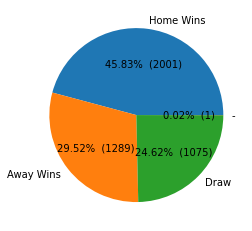

<Figure size 720x720 with 0 Axes>

In [ ]:
# Plotting above values on Pie chart
y = df['FTR'].value_counts()

mylabels = ["Home Wins", "Away Wins", "Draw", "-"]

plt.pie(y, labels = mylabels, autopct=make_autopct(y))
plt.figure(figsize=[10, 10])
plt.show()

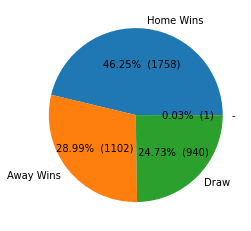

<Figure size 2880x1800 with 0 Axes>

In [ ]:
y = dfb19_20['FTR'].value_counts()

mylabels = ["Home Wins", "Away Wins", "Draw", "-"]

plt.pie(y, labels = mylabels, autopct=make_autopct(y))
plt.figure(figsize=(40, 25))
plt.show()

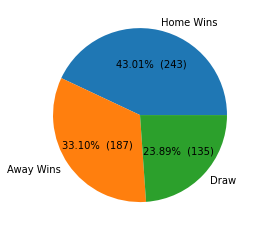

<Figure size 2880x1800 with 0 Axes>

In [ ]:
y = df19_21['FTR'].value_counts()

mylabels = ["Home Wins", "Away Wins", "Draw"]

plt.pie(y, labels = mylabels, autopct=make_autopct(y))
plt.figure(figsize=(40, 25))
plt.show()

In [ ]:
# Testing Data by finding average goals scored and conceded both home and away
avg_home_goals_overall = df.FTHG.sum()* 1.0 / df.shape[0]
avg_away_goals_overall = df.FTAG.sum()* 1.0 / df.shape[0]
avg_home_goals_overall = round(avg_home_goals_overall, 2)
avg_away_goals_overall = round(avg_away_goals_overall, 2)
avg_home_conceded_overall = avg_away_goals_overall
avg_away_conceded_overall = avg_home_goals_overall

print("Average goals scored at home overall: ", avg_home_goals_overall)
print("Average goals scored away overall: ", avg_away_goals_overall)
print("Average goals conceded at home overall: ", avg_home_conceded_overall)
print("Average goals conceded away overall: ", avg_away_conceded_overall)

#Average Red cards BEFORE the 19/20 season
print()
avg_home_red_cards_overall = df.HR.sum()* 1.0 / df.shape[0]
avg_away_red_cards_overall = df.AR.sum()* 1.0 / df.shape[0]
avg_home_red_cards_overall = round(avg_home_red_cards_overall, 2)
avg_away_red_cards_overall = round(avg_away_red_cards_overall, 2)
print("Average Red cards at home after the 18/19 season: ", avg_home_red_cards_overall)
print("Average red cards away after the 18/19 season: ", avg_away_red_cards_overall)

#Average fouls BEFORE the 19/20 season
print()
avg_home_fouls = df.HF.sum() * 1.0 / df.shape[0]
avg_away_fouls = df.AF.sum() * 1.0 / df.shape[0]
avg_home_fouls = round(avg_home_fouls, 2)
avg_away_fouls = round(avg_away_fouls, 2)
print("Average home fouls: ", avg_home_fouls)
print("Average away fouls: ", avg_away_fouls)

Average goals scored at home overall:  1.56
Average goals scored away overall:  1.19
Average goals conceded at home overall:  1.19
Average goals conceded away overall:  1.56

Average Red cards at home after the 18/19 season:  0.06
Average red cards away after the 18/19 season:  0.08

Average home fouls:  10.64
Average away fouls:  11.11


In [ ]:
# Average of scores before the 19/20 season
# Testing Data by finding average goals scored and conceded both home and away
avg_home_goals_before_19_20 = dfb19_20.FTHG.sum()* 1.0 / dfb19_20.shape[0]
avg_away_goals_before_19_20 = dfb19_20.FTAG.sum()* 1.0 / dfb19_20.shape[0]

avg_home_conceded_before_19_20 = avg_away_goals_before_19_20
avg_away_conceded_before_19_20 = avg_home_goals_before_19_20
print("Average goals scored at home before season 19/20: ", avg_home_goals_before_19_20)
print("Average goals scored away before season 19/20: ", avg_away_goals_before_19_20)
print("Average goals conceded at home before season 19/20: ", avg_home_conceded_before_19_20)
print("Average goals conceded away before season 19/20: ", avg_away_conceded_before_19_20)

#Average Red cards BEFORE the 19/20 season
print()
avg_home_red_cards_before_19_20 = dfb19_20.HR.sum()* 1.0 / dfb19_20.shape[0]
avg_away_red_cards_before_19_20 = dfb19_20.AR.sum()* 1.0 / dfb19_20.shape[0]
print("Average Red cards at home after the 18/19 season: ", avg_home_red_cards_before_19_20)
print("Average red cards away after the 18/19 season: ", avg_away_red_cards_before_19_20)

#Average fouls BEFORE the 19/20 season
print()
avg_home_fouls_before_19_20 = dfb19_20.HF.sum() * 1.0 / dfb19_20.shape[0]
avg_away_fouls_before_19_20 = dfb19_20.AF.sum() * 1.0 / dfb19_20.shape[0]
print("Average home fouls: ", avg_home_fouls_before_19_20)
print("Average away fouls: ", avg_away_fouls_before_19_20)

Average goals scored at home before season 19/20:  1.5701131281241778
Average goals scored away before season 19/20:  1.1796895553801632
Average goals conceded at home before season 19/20:  1.1796895553801632
Average goals conceded away before season 19/20:  1.5701131281241778

Average Red cards at home after the 18/19 season:  0.059458037358589844
Average red cards away after the 18/19 season:  0.08708234675085504

Average home fouls:  10.615890555117074
Average away fouls:  11.131018153117601


In [ ]:
# Average of home/away goals scored after the 18/19 season
# Testing Data by finding average goals scored and conceded both home and away
avg_home_goals_19_21 = df19_21.FTHG.sum()* 1.0 / df19_21.shape[0]
avg_away_goals_19_21 = df19_21.FTAG.sum()* 1.0 / df19_21.shape[0]
avg_home_conceded_19_21 = avg_away_goals_19_21
avg_away_conceded_19_21 = avg_home_goals_19_21
print("Average goals scored at home after the 18/19 season: ", avg_home_goals_19_21)
print("Average goals scored away after the 18/19 season: ", avg_away_goals_19_21)
print("Average goals conceded at home after the 18/19 season: ", avg_home_conceded_19_21)
print("Average goals conceded away after the 18/19 season: ", avg_away_conceded_19_21)

#Average Red cards AFTER the 18/19 season
print()
avg_home_red_cards_19_21 = df19_21.HR.sum()* 1.0 / df19_21.shape[0]
avg_away_red_cards_19_21 = df19_21.AR.sum()* 1.0 / df19_21.shape[0]
print("Average red cards at home after the 18/19 season: ", avg_home_red_cards_19_21)
print("Average red cards away after the 18/19 season: ", avg_away_red_cards_19_21)

#Average fouls AFTER the 18/19 season
print()
avg_home_fouls_19_21 = df19_21.HF.sum() * 1.0 / df19_21.shape[0]
avg_away_fouls_19_21 = df19_21.AF.sum() * 1.0 / df19_21.shape[0]
print("Average home fouls after the 18/19 season: ", round(avg_home_fouls_19_21, 2))
print("Average away fouls after the 18/19 season: ", avg_away_fouls_19_21)

Average goals scored at home after the 18/19 season:  1.4690265486725664
Average goals scored away after the 18/19 season:  1.2513274336283187
Average goals conceded at home after the 18/19 season:  1.2513274336283187
Average goals conceded away after the 18/19 season:  1.4690265486725664

Average red cards at home after the 18/19 season:  0.0584070796460177
Average red cards away after the 18/19 season:  0.061946902654867256

Average home fouls after the 18/19 season:  10.79
Average away fouls after the 18/19 season:  10.941592920353981


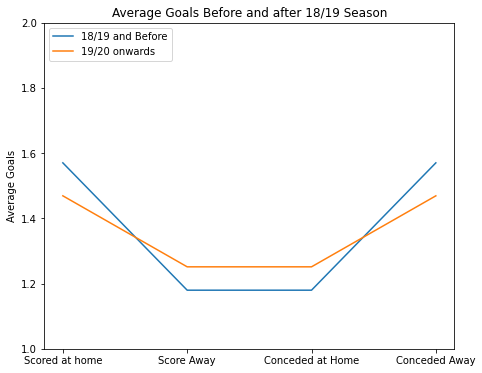

In [ ]:
''' --- Plot --- '''
names = ["Scored at home", "Score Away", "Conceded at Home", "Conceded Away"]
values_19 = [avg_home_goals_before_19_20, avg_away_goals_before_19_20, avg_home_conceded_before_19_20, avg_away_conceded_before_19_20]
values_20 = [avg_home_goals_19_21, avg_away_goals_19_21, avg_home_conceded_19_21, avg_away_conceded_19_21]

plt.figure(figsize=(25, 6))
plt.subplot(133)
plt.plot(names, values_19, label="18/19 and Before")
plt.plot(names, values_20, label="19/20 onwards")
plt.legend(loc="upper left")
plt.ylim(1, 2)

plt.ylabel("Average Goals")
plt.title("Average Goals Before and after 18/19 Season")

plt.show()

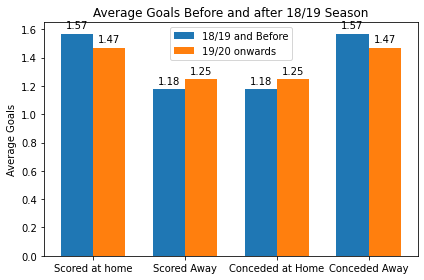

<Figure size 2880x1800 with 0 Axes>

In [ ]:
labels = ["Scored at home", "Scored Away", "Conceded at Home", "Conceded Away"]
values_19 = [round(avg_home_goals_before_19_20, 2), round(avg_away_goals_before_19_20, 2), round(avg_home_conceded_before_19_20, 2), round(avg_away_conceded_before_19_20, 2)]
values_20 = [round(avg_home_goals_19_21, 2), round(avg_away_goals_19_21, 2), round(avg_home_conceded_19_21, 2), round(avg_away_conceded_19_21, 2)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_19, width, label='18/19 and Before')
rects2 = ax.bar(x + width/2, values_20, width, label='19/20 onwards')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Goals')
ax.set_title('Average Goals Before and after 18/19 Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.figure(figsize=(40, 25))
plt.show()

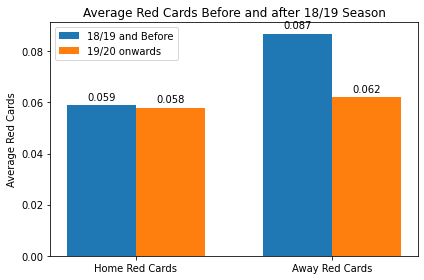

<Figure size 2880x1800 with 0 Axes>

In [ ]:
labels = ["Home Red Cards", "Away Red Cards"]
values_19 = [round(avg_home_red_cards_before_19_20, 3), round(avg_away_red_cards_before_19_20, 3)]
values_20 = [round(avg_home_red_cards_19_21, 3), round(avg_away_red_cards_19_21, 3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_19, width, label='18/19 and Before')
rects2 = ax.bar(x + width/2, values_20, width, label='19/20 onwards')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Red Cards')
ax.set_title('Average Red Cards Before and after 18/19 Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.figure(figsize=(40, 25))
plt.show()

In [ ]:
dfb19_20.shape[0]

3801

In [ ]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table = table[:-10]
table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS


In [ ]:
df = df[:-10]
df.shape[0]

4356

In [ ]:
res_home = df.groupby('HomeTeam')
res_away = df.groupby('AwayTeam')

In [ ]:
table.Team = res_home.HomeTeam.all().values
table.HGS = res_home.FTHG.sum().values
table.HGC = res_home.FTAG.sum().values
table.AGS = res_away.FTAG.sum().values
table.AGC = res_away.FTHG.sum().values

In [ ]:
table.Team

0     False
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
Name: Team, dtype: bool

In [ ]:
num_games = df.shape[0]/20

In [ ]:
num_games

217.8

In [ ]:
df.head(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,12/09/2020,Fulham,Arsenal,0.0,3.0,A,0.0,1.0,A,C Kavanagh,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0
1,12/09/2020,Crystal Palace,Southampton,1.0,0.0,H,1.0,0.0,H,Jj Moss,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0
2,12/09/2020,Liverpool,Leeds,4.0,3.0,H,3.0,2.0,H,M Oliver,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0
3,12/09/2020,West Ham,Newcastle,0.0,2.0,A,0.0,0.0,D,S Attwell,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0
4,13/09/2020,West Brom,Leicester,0.0,3.0,A,0.0,0.0,D,A Taylor,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0
5,13/09/2020,Tottenham,Everton,0.0,1.0,A,0.0,0.0,D,M Atkinson,9.0,15.0,5.0,4.0,15.0,7.0,5.0,3.0,1.0,0.0,0.0,0.0
6,14/09/2020,Brighton,Chelsea,1.0,3.0,A,0.0,1.0,A,C Pawson,13.0,10.0,3.0,5.0,8.0,13.0,4.0,3.0,1.0,0.0,0.0,0.0
7,14/09/2020,Sheffield United,Wolves,0.0,2.0,A,0.0,2.0,A,M Dean,9.0,11.0,2.0,4.0,13.0,7.0,12.0,5.0,2.0,1.0,0.0,0.0
8,19/09/2020,Everton,West Brom,5.0,2.0,H,2.0,1.0,H,M Dean,17.0,6.0,7.0,4.0,9.0,11.0,11.0,1.0,1.0,0.0,0.0,1.0
9,19/09/2020,Leeds,Fulham,4.0,3.0,H,2.0,1.0,H,A Taylor,10.0,14.0,7.0,6.0,13.0,18.0,5.0,3.0,1.0,2.0,0.0,0.0


In [ ]:
table.HAS = (table.HGS / num_games) / avg_home_goals_overall
table.AAS = (table.AGS / num_games) / avg_away_goals_overall
table.HDS = (table.HGC / num_games) / avg_home_conceded_overall
table.ADS = (table.AGC / num_games) / avg_away_conceded_overall
table.head(100)

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,False,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,True,454.0,350.0,1.338753,1.351583,193.0,303.0,0.745302,0.893485
2,True,191.0,162.0,0.563220,0.625590,217.0,281.0,0.837982,0.828612
3,True,38.0,36.0,0.112054,0.139020,35.0,68.0,0.135158,0.200518
4,True,76.0,58.0,0.224108,0.223977,67.0,125.0,0.258732,0.368599
5,True,30.0,25.0,0.088464,0.096542,37.0,41.0,0.142882,0.120901
6,True,81.0,57.0,0.238852,0.220115,93.0,106.0,0.359135,0.312572
7,True,136.0,105.0,0.401036,0.405475,148.0,182.0,0.571527,0.536681
8,True,73.0,57.0,0.215262,0.220115,95.0,102.0,0.366858,0.300777
9,True,130.0,109.0,0.383343,0.420922,149.0,218.0,0.575388,0.642837


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


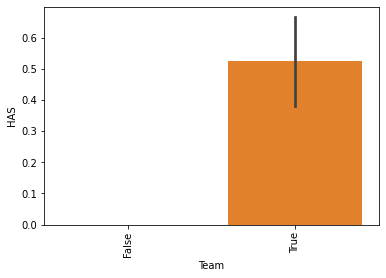

In [ ]:
has_plot = sns.barplot(table.Team,table.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)